In [1]:
# python libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.mplot3d import Axes3D
from datetime import datetime

In [2]:
# magic
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
# hacks
import os
import sys
nb_dir = os.path.join( os.path.split(os.path.abspath(os.getcwd()))[0], 'python' )
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

In [19]:
import Constants
import Earth

In [5]:
masterlist = Earth.fetch_sims()

C:\Users\EricK\crayfis\GZ\python\File.py:107: RuntimeWarning: invalid value encountered in arccos
  delta_heading = np.arccos(np.dot( start_beta, stop_beta )) * 180. / np.pi


trajectory C:\Users\EricK\crayfis\GZ\sim\THETAX_005\Z92_E002e18_PHIX090_R4.0.pdat misses earth by 1.1 x Re
	 skipping b/c proton..
trajectory C:\Users\EricK\crayfis\GZ\sim\THETAX_005\Z92_E002e18_PHIX090_R5.0.pdat misses earth by 1.4 x Re
	 skipping b/c proton..
trajectory C:\Users\EricK\crayfis\GZ\sim\THETAX_005\Z92_E002e18_PHIX270_R4.0.pdat misses earth by 1.1 x Re
	 skipping b/c proton..
trajectory C:\Users\EricK\crayfis\GZ\sim\THETAX_005\Z92_E002e18_PHIX270_R5.0.pdat misses earth by 1.4 x Re
	 skipping b/c proton..
trajectory C:\Users\EricK\crayfis\GZ\sim\THETAX_030\Z92_E002e18_PHIX090_R4.0.pdat misses earth by 1.2 x Re
	 skipping b/c proton..
trajectory C:\Users\EricK\crayfis\GZ\sim\THETAX_030\Z92_E002e18_PHIX090_R5.0.pdat misses earth by 1.6 x Re
	 skipping b/c proton..
trajectory C:\Users\EricK\crayfis\GZ\sim\THETAX_030\Z92_E002e18_PHIX270_R4.0.pdat misses earth by 1.2 x Re
	 skipping b/c proton..
trajectory C:\Users\EricK\crayfis\GZ\sim\THETAX_030\Z92_E002e18_PHIX270_R5.0.pdat m

trajectory C:\Users\EricK\crayfis\GZ\sim\THETAX_150\Z92_E002e18_PHIX180_R5.0.pdat misses earth by 1.1 x Re
	 skipping b/c proton..
trajectory C:\Users\EricK\crayfis\GZ\sim\THETAX_150\Z92_E002e18_PHIX270_R1.0.pdat misses earth by 1.2 x Re
	 skipping b/c proton..
trajectory C:\Users\EricK\crayfis\GZ\sim\THETAX_150\Z92_E002e18_PHIX270_R1.5.pdat misses earth by 2.1 x Re
	 skipping b/c proton..
trajectory C:\Users\EricK\crayfis\GZ\sim\THETAX_150\Z92_E002e18_PHIX270_R2.0.pdat misses earth by 2.4 x Re
	 skipping b/c proton..
trajectory C:\Users\EricK\crayfis\GZ\sim\THETAX_150\Z92_E002e18_PHIX270_R2.5.dat misses earth by 1.1 x Re
	skipping..
trajectory C:\Users\EricK\crayfis\GZ\sim\THETAX_150\Z92_E002e18_PHIX270_R3.0.dat misses earth by 1.2 x Re
	skipping..
trajectory C:\Users\EricK\crayfis\GZ\sim\THETAX_150\Z92_E002e18_PHIX270_R3.5.dat misses earth by 1.3 x Re
	skipping..
trajectory C:\Users\EricK\crayfis\GZ\sim\THETAX_150\Z92_E002e18_PHIX270_R4.0.dat misses earth by 1.4 x Re
	skipping..
traj

trajectory C:\Users\EricK\crayfis\GZ\sim\THETAX_175\Z92_E002e18_PHIX000_R1.0.dat misses earth by 5.3 x Re
	skipping..
trajectory C:\Users\EricK\crayfis\GZ\sim\THETAX_175\Z92_E002e18_PHIX000_R1.5.dat misses earth by 10.9 x Re
	skipping..
trajectory C:\Users\EricK\crayfis\GZ\sim\THETAX_175\Z92_E002e18_PHIX000_R2.0.dat misses earth by 11.0 x Re
	skipping..
trajectory C:\Users\EricK\crayfis\GZ\sim\THETAX_175\Z92_E002e18_PHIX000_R2.5.dat misses earth by 11.1 x Re
	skipping..
trajectory C:\Users\EricK\crayfis\GZ\sim\THETAX_175\Z92_E002e18_PHIX000_R3.0.dat misses earth by 11.1 x Re
	skipping..
trajectory C:\Users\EricK\crayfis\GZ\sim\THETAX_175\Z92_E002e18_PHIX000_R3.5.dat misses earth by 11.1 x Re
	skipping..
trajectory C:\Users\EricK\crayfis\GZ\sim\THETAX_175\Z92_E002e18_PHIX000_R4.0.dat misses earth by 11.1 x Re
	skipping..
trajectory C:\Users\EricK\crayfis\GZ\sim\THETAX_175\Z92_E002e18_PHIX000_R5.0.dat misses earth by 11.1 x Re
	skipping..
trajectory C:\Users\EricK\crayfis\GZ\sim\THETAX_1

In [6]:
heliumlist  = Earth.filter_sims(masterlist, Zparent=2)
oxygenlist  = Earth.filter_sims(masterlist, Zparent=8)
ironlist    = Earth.filter_sims(masterlist, Zparent=26)
uraniumlist = Earth.filter_sims(masterlist, Zparent=92)

In [7]:
Earth.add_probabilities(heliumlist)
Earth.add_probabilities(oxygenlist)
Earth.add_probabilities(ironlist)
Earth.add_probabilities(uraniumlist)

In [8]:
for He in heliumlist:
    plt.semilogy( He['probability']['path'][0], He['probability']['path'][1] )
plt.show()

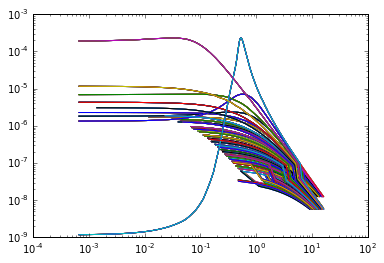

In [16]:
for O in oxygenlist:
    plt.loglog( O['probability']['path'][0], O['probability']['path'][1] )
plt.show()

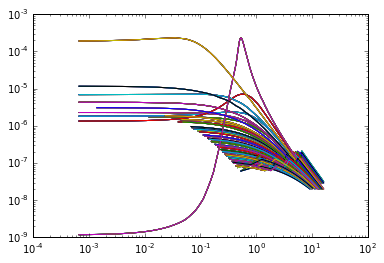

In [17]:
for Fe in ironlist:
    plt.loglog( Fe['probability']['path'][0], Fe['probability']['path'][1] )
plt.show()

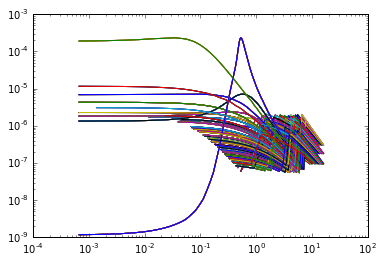

In [18]:
for U in uraniumlist:
    plt.loglog( U['probability']['path'][0], U['probability']['path'][1] )
plt.show()

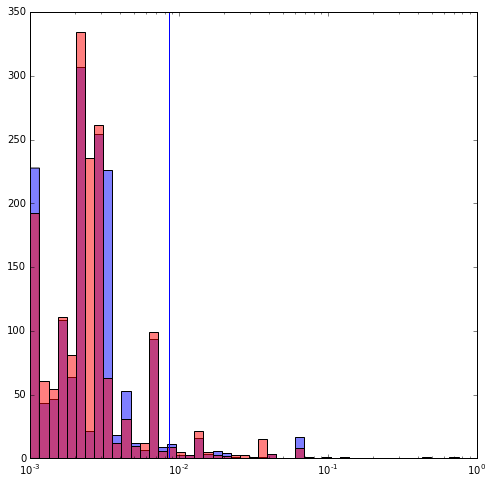

In [24]:
Earth.plot_histogram(oxygenlist)

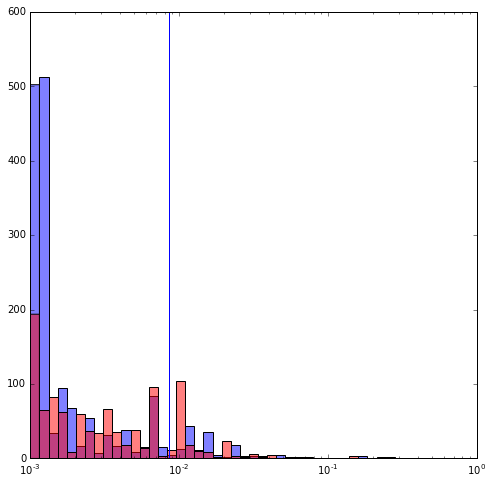

In [25]:
Earth.plot_histogram(ironlist)

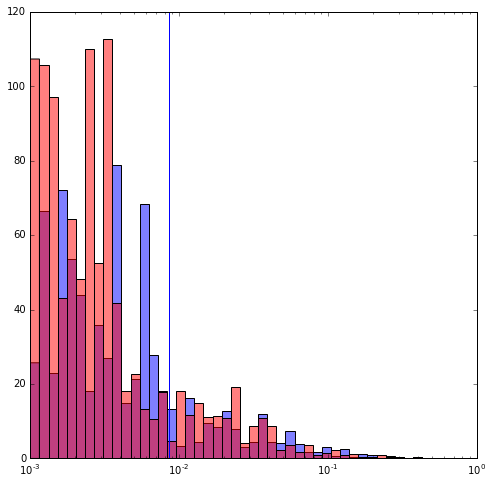

In [26]:
Earth.plot_histogram(uraniumlist)